<a href="https://colab.research.google.com/github/Skander28/CodeClause_Customer_Churn_Analysis/blob/main/Customer_Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Churn Analysis**

### **Importations**

In [73]:

from sklearn import preprocessing
import matplotlib as mlp
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn
import seaborn as sns
%matplotlib inline 

### **Importing Data**

In [74]:
from google.colab import drive

In [75]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
churn_data = pd.read_csv('/content/drive/MyDrive/bigml_59c28831336c6604c800002a.csv')

print (churn_data.shape)

(3333, 21)


In [77]:
churn_data.head(3)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


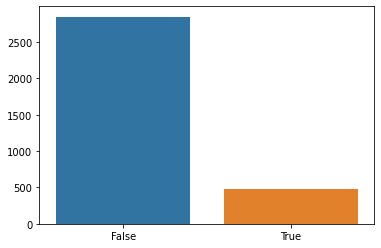

In [78]:
y = churn_data["churn"].value_counts()
sns.barplot(y.index, y.values)

In [79]:
y_True = churn_data["churn"][churn_data["churn"] == True]
print ("Churn Percentage = "+str( (y_True.shape[0] / churn_data["churn"].shape[0]) * 100 ))

Churn Percentage = 14.491449144914492


## **Descriptive Analysis**

In [80]:
churn_data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


### **Churn By State**

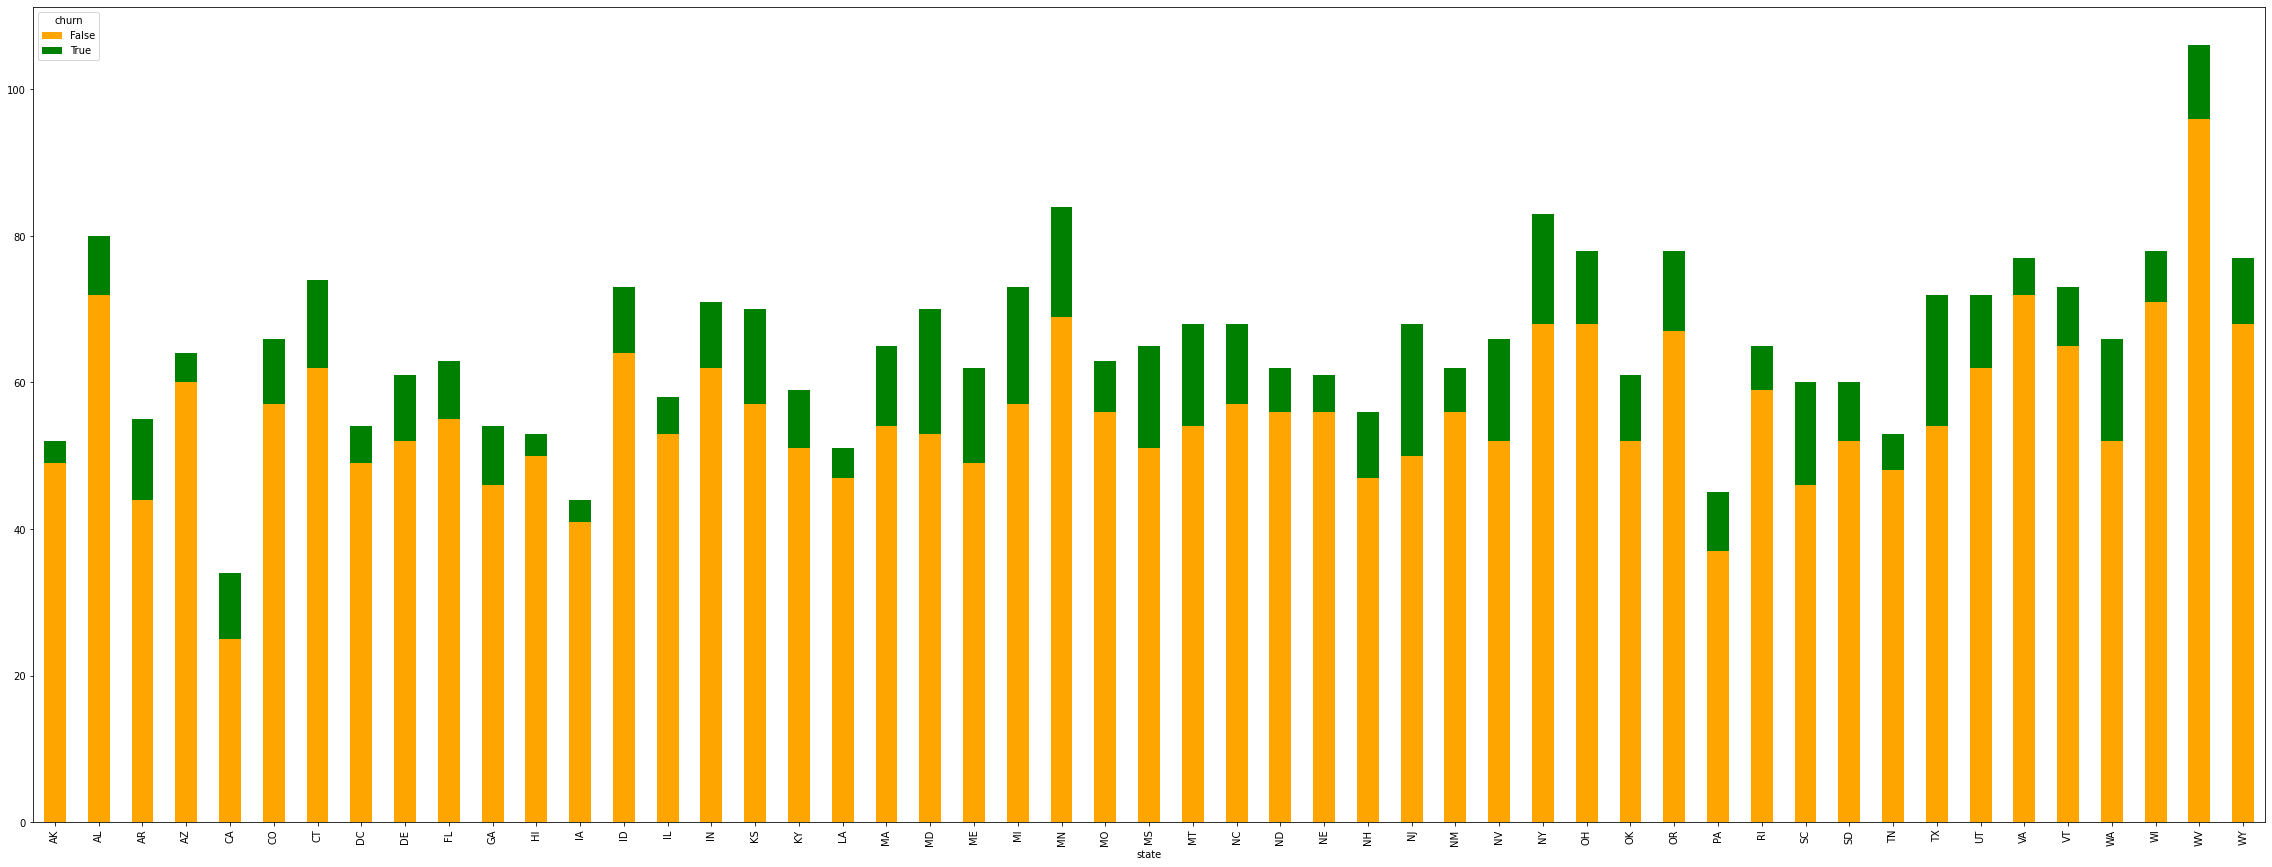

In [81]:
churn_data.groupby(["state", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(40,15),color=('orange','green'))

### **Churn By Area Code**

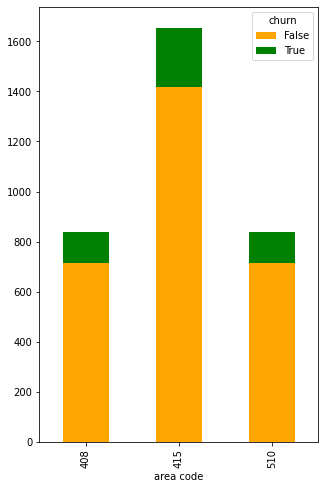

In [82]:
churn_data.groupby(["area code", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,8),color=('orange','green')) 

### **Churn By Customers with International plan**

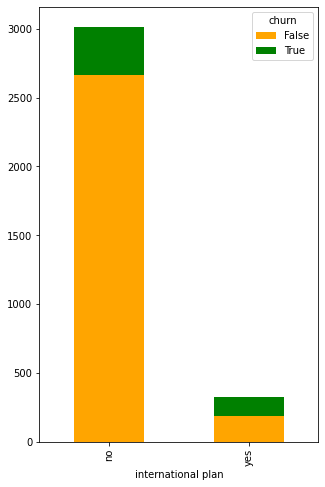

In [83]:
churn_data.groupby(["international plan", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,8),color=('orange','green')) 

### **Churn By Customers with Voice mail plan**

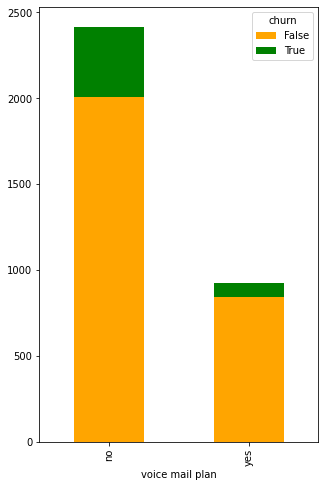

In [84]:
churn_data.groupby(["voice mail plan", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,8),color=('orange','green')) 

## **Handle Categorical Cols - Label Encode**

In [85]:
label_encoder = preprocessing.LabelEncoder()

In [86]:
churn_data['state'] = label_encoder.fit_transform(churn_data['state'])
churn_data['international plan'] = label_encoder.fit_transform(churn_data['international plan'])
churn_data['voice mail plan'] = label_encoder.fit_transform(churn_data['voice mail plan'])


print (churn_data.dtypes)

state                       int64
account length              int64
area code                   int64
phone number               object
international plan          int64
voice mail plan             int64
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object


In [87]:
churn_data.shape

(3333, 21)

In [88]:
churn_data.head

<bound method NDFrame.head of       state  account length  area code phone number  international plan  \
0        16             128        415     382-4657                   0   
1        35             107        415     371-7191                   0   
2        31             137        415     358-1921                   0   
3        35              84        408     375-9999                   1   
4        36              75        415     330-6626                   1   
...     ...             ...        ...          ...                 ...   
3328      3             192        415     414-4276                   0   
3329     49              68        415     370-3271                   0   
3330     39              28        510     328-8230                   0   
3331      6             184        510     364-6381                   1   
3332     42              74        415     400-4344                   0   

      voice mail plan  number vmail messages  total day minutes  \
0 

### **Build Feature Matrix**

In [89]:
y = churn_data['churn'].to_numpy().astype(int)
y.size

3333

In [90]:
churn_data.drop(['phone number' , 'churn'], axis=1, inplace =True)

In [91]:
x =churn_data.to_numpy().astype(float)

In [92]:
x

array([[ 16.  , 128.  , 415.  , ...,   3.  ,   2.7 ,   1.  ],
       [ 35.  , 107.  , 415.  , ...,   3.  ,   3.7 ,   1.  ],
       [ 31.  , 137.  , 415.  , ...,   5.  ,   3.29,   0.  ],
       ...,
       [ 39.  ,  28.  , 510.  , ...,   6.  ,   3.81,   2.  ],
       [  6.  , 184.  , 510.  , ...,  10.  ,   1.35,   2.  ],
       [ 42.  ,  74.  , 415.  , ...,   4.  ,   3.7 ,   0.  ]])

In [93]:
scaler = preprocessing.StandardScaler()
x = scaler.fit_transform(x)

In [94]:
x

array([[-0.6786493 ,  0.67648946, -0.52360328, ..., -0.60119509,
        -0.0856905 , -0.42793202],
       [ 0.6031696 ,  0.14906505, -0.52360328, ..., -0.60119509,
         1.2411686 , -0.42793202],
       [ 0.33331299,  0.9025285 , -0.52360328, ...,  0.21153386,
         0.69715637, -1.1882185 ],
       ...,
       [ 0.87302621, -1.83505538,  1.71881732, ...,  0.61789834,
         1.3871231 ,  0.33235445],
       [-1.35329082,  2.08295458,  1.71881732, ...,  2.24335625,
        -1.87695028,  0.33235445],
       [ 1.07541867, -0.67974475, -0.52360328, ..., -0.19483061,
         1.2411686 , -1.1882185 ]])

### **Stratified Cross Validation**

In [95]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=42)

In [96]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


models=[]
models.append(('LR', LogisticRegression()))
models.append(('KNN' , KNeighborsClassifier()))
models.append(('GBC' , GradientBoostingClassifier()))
models.append(('SVC' , SVC()))
models.append(('RFC' , RandomForestClassifier()))
print(models)

[('LR', LogisticRegression()), ('KNN', KNeighborsClassifier()), ('GBC', GradientBoostingClassifier()), ('SVC', SVC()), ('RFC', RandomForestClassifier())]


### **Build Models And Train**

In [97]:
from sklearn.model_selection import KFold, cross_val_score

results = dict()
for name , model in models :
    kfold = KFold(n_splits=10 )
    cv_results = cross_val_score(model , x_train , y_train , cv=kfold , scoring='accuracy' )
    results[name] = (cv_results.mean() , cv_results.std())
    
print("name    results.mean()    results.std()")
for key , value in results.items() :
    print(key , value)

name    results.mean()    results.std()
LR (0.8600785672045281, 0.012453690133606496)
KNN (0.8852242966967981, 0.014706059417757666)
GBC (0.9501098251246093, 0.0063154714319578545)
SVC (0.9092281264960154, 0.011457285592688661)
RFC (0.953872039649686, 0.00868024718690152)


### **Modeling**

Text(0.5, 1.0, ' Logistic Regression')

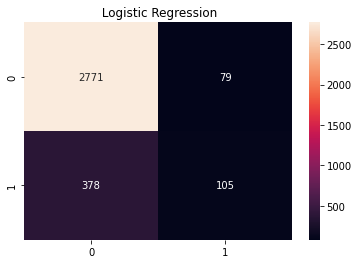

In [98]:
from sklearn import metrics

LG = LogisticRegression()
LG.fit(x,y)
y_pred = LG.predict(x)
LG_conf_matrix = metrics.confusion_matrix(y , y_pred)
sns.heatmap(LG_conf_matrix , annot=True , fmt='')
plt.title(' Logistic Regression')

Text(0.5, 1.0, 'KNeighbors Classifier')

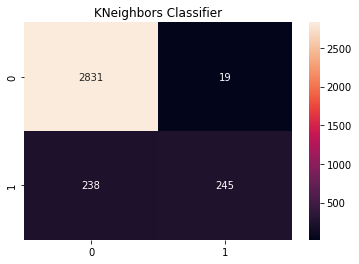

In [99]:
KNN = KNeighborsClassifier()
KNN.fit(x,y)
y_pred = KNN.predict(x)
KNN_conf_matrix = metrics.confusion_matrix(y , y_pred)
sns.heatmap(KNN_conf_matrix , annot=True , fmt='')
plt.title('KNeighbors Classifier')

Text(0.5, 1.0, ' Gradient Boosting Classifier')

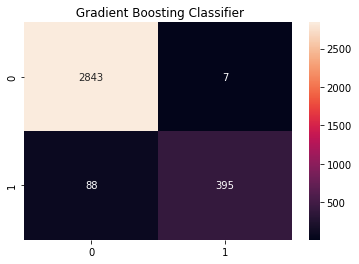

In [100]:
GBC = GradientBoostingClassifier()
GBC.fit(x,y)
y_pred = GBC.predict(x)
GBC_conf_matrix = metrics.confusion_matrix(y , y_pred)
sns.heatmap(GBC_conf_matrix , annot=True , fmt='')
plt.title(' Gradient Boosting Classifier')

Text(0.5, 1.0, ' SVC')

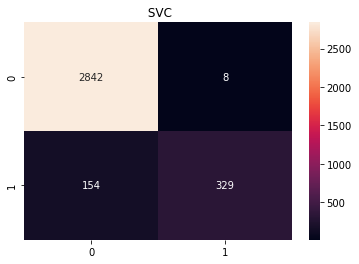

In [101]:
SVC = SVC()
SVC.fit(x,y)
y_pred = SVC.predict(x)
SVC_conf_matrix = metrics.confusion_matrix(y , y_pred)
sns.heatmap(SVC_conf_matrix , annot=True , fmt='')
plt.title(' SVC')

Text(0.5, 1.0, ' Random Forest  Classifie')

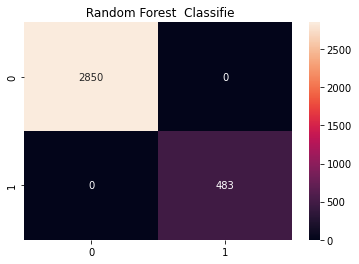

In [102]:
RFC = RandomForestClassifier()
RFC.fit(x,y)
y_pred = RFC.predict(x)
RFC_conf_matrix = metrics.confusion_matrix(y , y_pred)
sns.heatmap(RFC_conf_matrix , annot=True , fmt='')
plt.title(' Random Forest  Classifie')

**it seems that the Random Forest is the best model to select**

### **Final Model Selection**

In [103]:
RFC =RandomForestClassifier()
RFC.fit(x, y)

RandomForestClassifier()

[0.02459764 0.02953771 0.00749727 0.08126139 0.02220264 0.02837185
 0.12939714 0.03148736 0.13766825 0.06345344 0.02662371 0.0647231
 0.03547416 0.02823362 0.036947   0.03958497 0.05210954 0.04066274
 0.12016646]


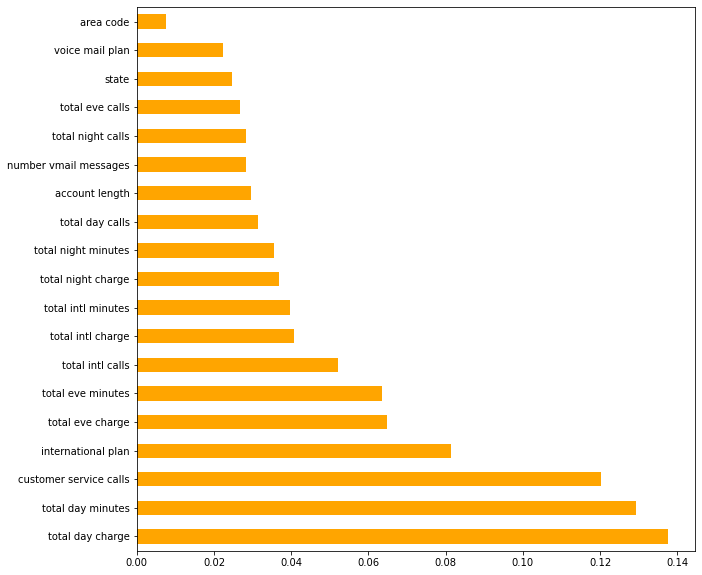

In [104]:
feature_importance = RFC.feature_importances_
print (RFC.feature_importances_)
feat_importances = pd.Series(RFC.feature_importances_, index=churn_data.columns)
feat_importances = feat_importances.nlargest(19)
feat_importances.plot(kind='barh' , figsize=(10,10),color='orange') 